In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\User\Desktop\Naresh IT\datafiles\Visadataset.csv")

In [3]:
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box plot**

- box plot is used for detect outliers 

- box plot has min q1 q2 q3 and max value 

- inside box plot red line represents median which 50 percentage 

**OUTLIER**

- very very huge obeservation 

- or very very small observation 

- which pull the data in any side of the distributuon 

- mild outliers 

    - q1-1.5*IQR  and q3+1.5*IQR

- Strong outliers 

    - q1-3*IQR and q3+3IQR

- IQR: inter quartile range 

    - IQR=q3-q1
 
- q1: 25p

- q2:50p

- q3:75p

In [5]:
visa_df=pd.read_csv(r"C:\Users\User\Desktop\Naresh IT\datafiles\Visadataset.csv")

In [6]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


         Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR


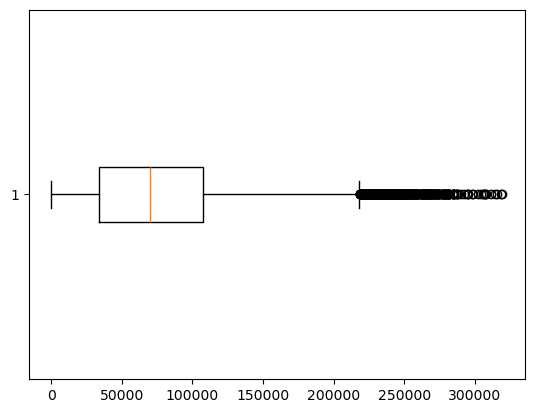

In [13]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

<Axes: >

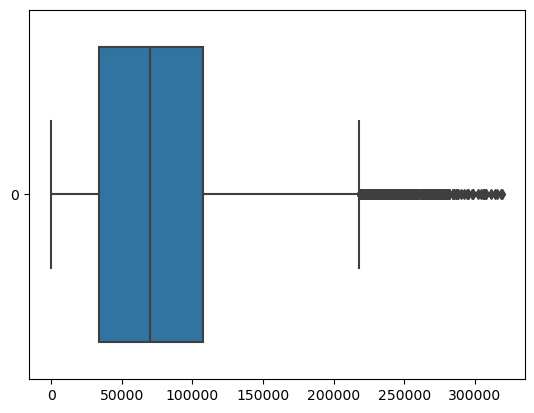

In [15]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')

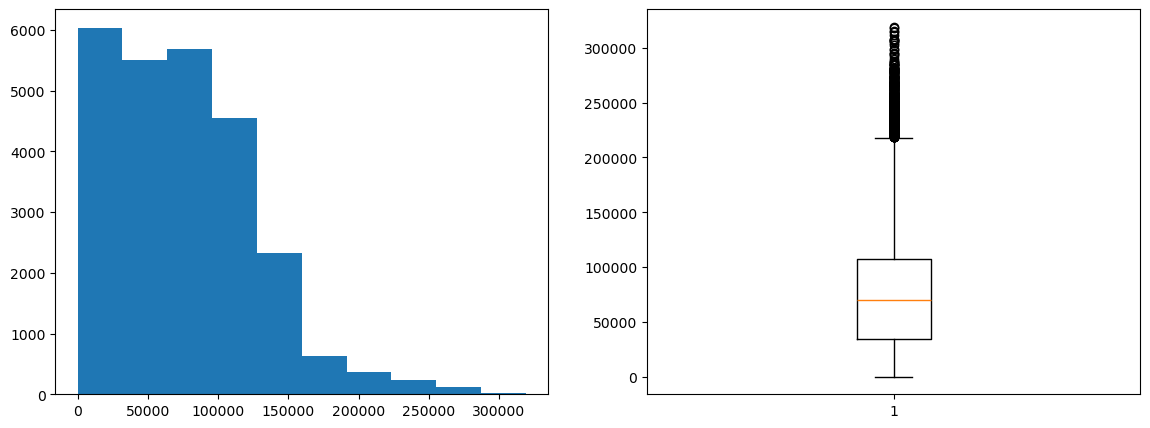

In [25]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the Outlier analysis**

- Outliers are available less than q1-1.5*IQR

- Outliers are available greater than q3+1.5*IQR

- Step1:

    - calculate Q1
 
    - calculate Q3
 
    - Calculate IQR:Q3-Q1
 
- Step2:

      - LB= Q1-1.5*IQR

      - UB= Q3+1.5*IQR

- Step3:

      - con1= visa_df['prevailing_wage']<LB

      - con2= visa_df['prevailing_wage']>UB

      - apply Or operator and get the outliers data

**Outliers data**

In [37]:
#Step1:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)


IQR=Q3-Q1
IQR

73720.03

In [28]:
#Step2:

LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

LB,UB

(-76564.565, 218315.555)

In [34]:
#Step3:

con1= visa_df['prevailing_wage']<LB

con2= visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]
outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [35]:
len(outliers_data)

427

**Non-outliers**

In [45]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)


IQR=Q3-Q1

LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

con1= visa_df['prevailing_wage']>LB
con2= visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

**Histogram and boxplot for non outliers data**

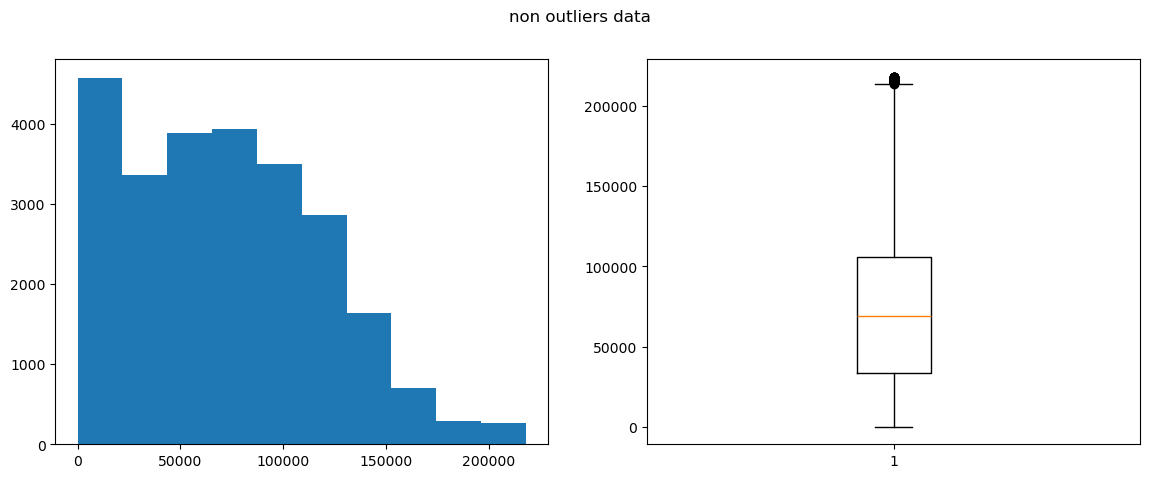

In [44]:
plt.figure(figsize=(14,5))
plt.suptitle('non outliers data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])#25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])#25053

plt.show()

**Comparing Total data with non outliers data**

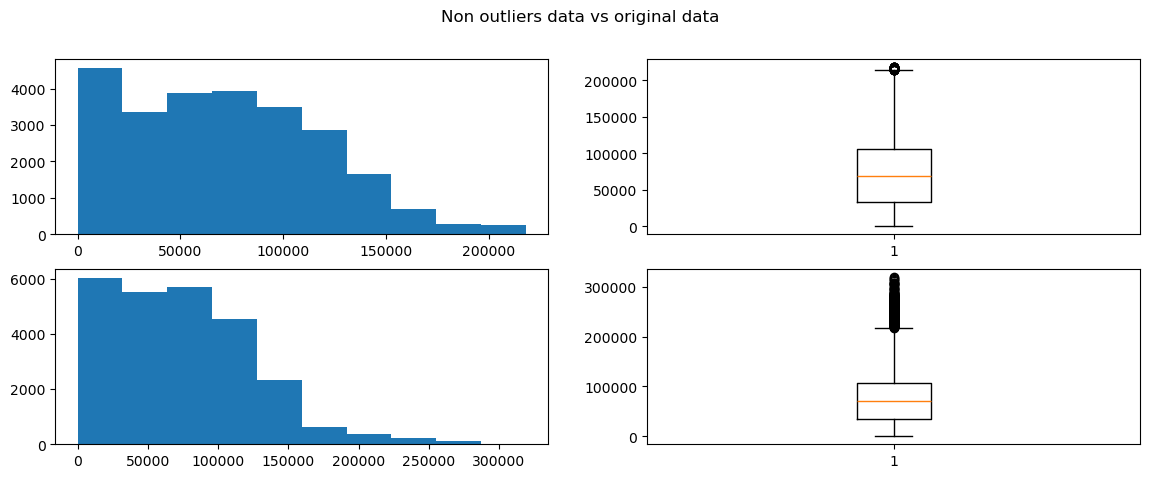

In [50]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data vs original data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])


plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])#25053
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])#25053

plt.show()

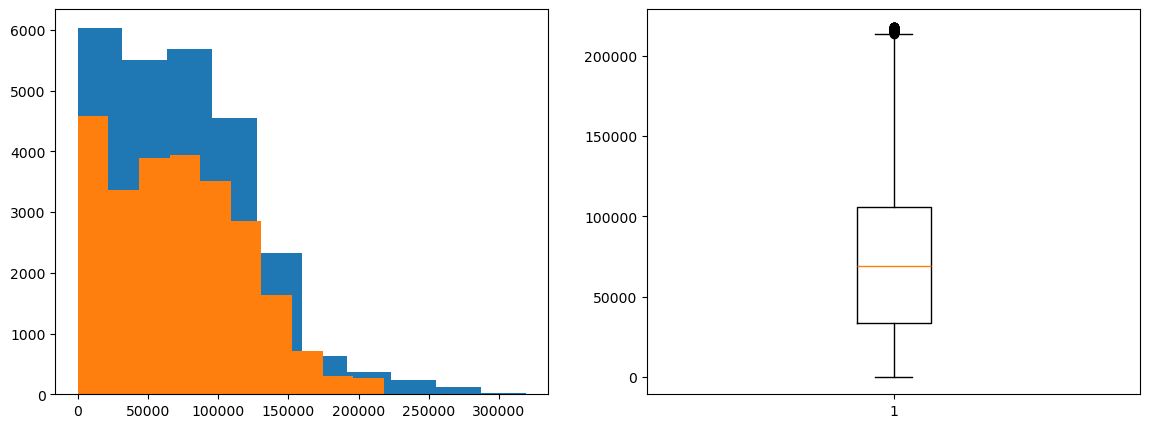

In [51]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**How to deal the outliers**

**Method-1  Drop the outliers **

-  Drop the outliers is not good idea

- When you drop the outliers, data will loss 

- for example here we are dropping 427 rows

- x% of 25480=427

- it is 1.7 data, here it is fine we can drop the outlier

**Method 2: Fill with median value**

- we already know that outliers does not affect the median

- so we can fill outliers by median 

**Method-3: Cap the values with Q1 and Q3**

- all less than lower bound values, we can replace with q1 or LB

- all greater than upper bound values, we can replace with q3 or UB

**Fill with median**

- create a empty list 

- iterate through visa_df['prevailing_wage'].values

- if each value i.e.i, <lb or >ub then append with median values

- else append with i value

In [62]:
l1=[]


median=visa_df['prevailing_wage'].median()

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q3=np.percentile(visa_df['prevailing_wage'],50)

IQR=Q3-Q1

LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

for value in visa_df['prevailing_wage'].values:
    if value<LB or value>UB:
        l1.append(median)
    else:
       fill.append(value)




**np.where**

- np.where will use for binary condition 

- it has 3 arguments

    - condition 

    - value if condition is True

    - value if condition False

In [69]:
d={'sub':["DS","ML","CS"],
   "Marks":[100,150,20]}

data=pd.DataFrame(d)

In [71]:
con= data['Marks']>100
l=np.where(con,1,data['Marks'])